<a href="https://colab.research.google.com/github/Qlassik-Mason/VirtualAssistance/blob/master/solutions_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


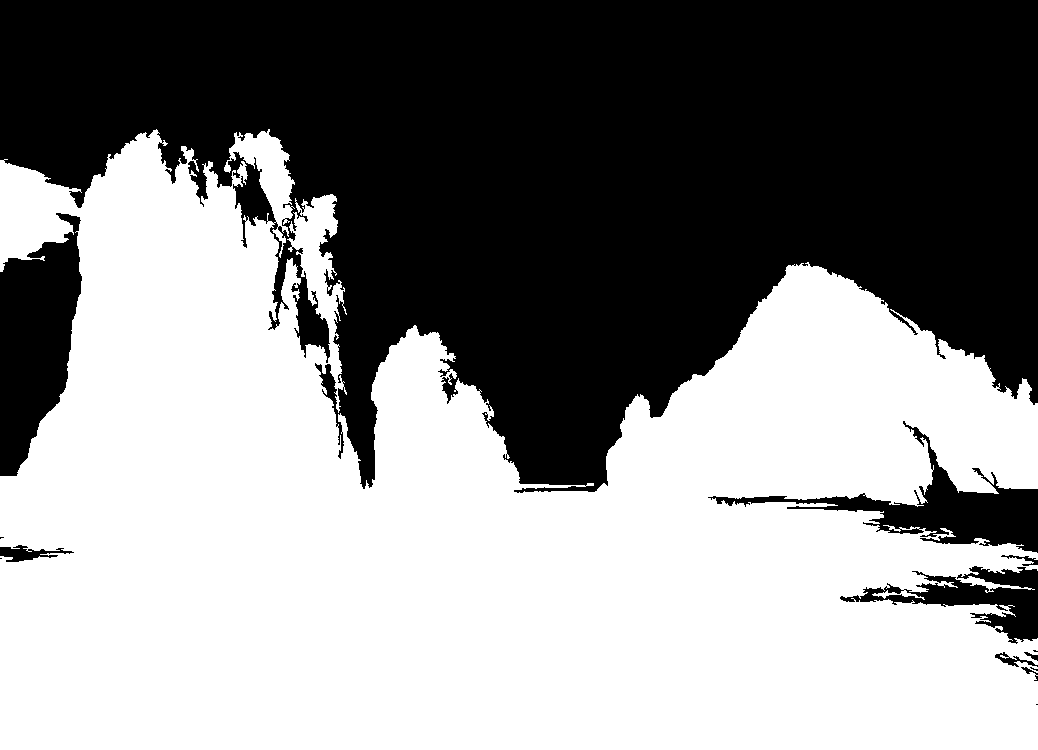

True

In [7]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt



# Mount Google drive to be able to access the files located on it
from google.colab import drive
drive.mount('/content/drive/')

data_img ='/content/drive/MyDrive/Image-segmentation/beach-and-boats.jpeg'

img = cv2.imread(data_img)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_ , tresh = cv2.threshold(gray,np.mean(gray), 255, cv2.THRESH_BINARY_INV   )



# GET CONTOURS

contours , hierarchy = cv2.findContours(tresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

#print(len(contours))

#  get the bigger area

cnt = sorted(contours, key=cv2.contourArea)[-1]


mask = np.zeros( (750, 1038), dtype="uint8" )

maskedRed = cv2.drawContours(mask,[cnt] , -1 , (0 , 0 , 255), -1)
maskedFinal = cv2.drawContours(mask,[cnt] , -1 , (255 , 255 , 255), -1)

finalImage = cv2.bitwise_and(img, img, mask=maskedFinal)

#cv2_imshow("Original", img)
cv2_imshow(maskedFinal)
#plt.imshow(img)
#plt.show()
#plt.imshow(maskedFinal)
#plt.show()
cv2.imwrite("maskedFinal.jpg",maskedFinal)
#cv2.imwrite("finalImage.jpg",finalImage)





